## Score: 45

## Comment: 

<font color=Red>
Q1.[5+10+10] Correct
<br><br>
Q2.[5] 编码字段定义为：direction angle- quality code-type code-speed rate-speed quality code
第4个字段为风速，第5个为风速质量控制码（speed quality code）。你的代码似乎没有按“风速质量码”筛风速，风速极端值大大增加。
<br><br>
Q3.[5+5+5] Correct
<br><br>
</font>

In [9]:
# import pandas 
import pandas as pd
# import numpy
import numpy as np
# import matplotlib
from matplotlib import pyplot as plt

In [10]:
# 读取tsv文件，以制表符为分隔，命名为Sig_Eqs
Sig_Eqs = pd.read_csv(r"D:\ESE5023\data\earthquakes-2025-11-05_21-08-05_+0800.tsv", sep='\t')

In [11]:
# 数据预览
Sig_Eqs.head()

,Search Parameters,Id,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,-2150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2.0,-2000.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,3.0,-2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
4,NaN,5877.0,-1610.0,NaN,NaN,NaN,NaN,NaN,3.0,1351.0,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN


In [12]:
# 1.1各国总死亡人数，打印前10
country_deaths = Sig_Eqs.groupby("Country")["Deaths"].sum()
top10 = country_deaths.sort_values(ascending=False).head(10)
print(top10)

Country
CHINA         2139210.0
TURKEY        1199742.0
IRAN          1014453.0
ITALY          498219.0
SYRIA          419226.0
HAITI          323484.0
AZERBAIJAN     319251.0
JAPAN          242445.0
ARMENIA        191890.0
PAKISTAN       145083.0
Name: Deaths, dtype: float64


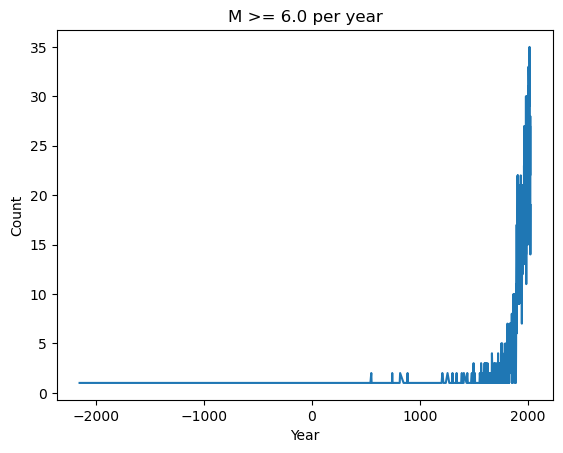

趋势分析：1. 公元前无数据，可能是由于历史记录不完整；2. 随时间推移，地震记录数量逐渐增多；3. 地震活动本身可能没有显著增加，但监测能力提升使得更多地震被记录


In [13]:
# 1.2计算每年全球震级大于6的地震总数，并绘制时间序列图
# 震级 >= 6.0
big = Sig_Eqs[Sig_Eqs["Mag"] >= 6.0]
# 按年份计数
year_counts = big.groupby("Year").size()
year_counts = year_counts.reset_index(name="Count")
# 绘图
plt.figure()
plt.plot(year_counts["Year"], year_counts["Count"])
plt.title("M >= 6.0 per year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()
year_counts.head()
print("趋势分析：1. 公元前无数据，可能是由于历史记录不完整；2. 随时间推移，地震记录数量逐渐增多；3. 地震活动本身可能没有显著增加，但监测能力提升使得更多地震被记录")

In [14]:
# 1.3编写函数CountEq_LargestEq
import datetime as dt
import pandas as pd
def CountEq_LargestEq(country):
    sub = Sig_Eqs[Sig_Eqs["Country"] == country]
    total = len(sub)
    # 该国没有任何有效震级
    if not sub["Mag"].notna().any():
        return total, None
    idx = sub["Mag"].dropna().idxmax()
    row = sub.loc[idx]
    y = int(row["Year"])
    m = int(row["Mo"]) if pd.notna(row.get("Mo")) else 1
    d = int(row["Dy"]) if pd.notna(row.get("Dy")) else 1
    # 年份<=0（公元前），用字符串返回；否则用 datetime.date
    if y <= 0:
        bce_year = abs(y) + 1   # 无0年，所以+1
        date_of_largest = f"{bce_year} BCE-{m:02d}-{d:02d}"
    else:
        date_of_largest = dt.date(y, m, d)
    return total, date_of_largest
# 测试
CountEq_LargestEq("CHINA")

(623, datetime.date(1668, 7, 25))

In [15]:
# 1.3 应用于每个国家并按降序报告
results = []
for c in Sig_Eqs["Country"].dropna().unique():
    total, date_ = CountEq_LargestEq(c)
    results.append([c, total, date_])
out = pd.DataFrame(results, columns=["Country", "Total_Earthquakes", "Date_of_Largest_Eq"])
out = out.sort_values("Total_Earthquakes", ascending=False).reset_index(drop=True)
# 由于数据太多，只打印前15行
out.head(15)


,Country,Total_Earthquakes,Date_of_Largest_Eq
0,CHINA,623,1668-07-25
1,JAPAN,424,2011-03-11
2,INDONESIA,421,2004-12-26
3,IRAN,388,0856-12-22
4,TURKEY,358,1939-12-26
5,ITALY,333,1915-01-13
6,GREECE,289,0365-07-21
7,USA,280,1964-03-28
8,PHILIPPINES,230,1897-09-21
9,MEXICO,214,1787-03-28


In [16]:
# 2.深圳风速变化趋势
data = pd.read_csv(r"D:\ESE5023\data\2281305.csv")
# 数据预览
data.head()

C:\Users\22364\AppData\Local\Temp\ipykernel_29772\2319726617.py:2: DtypeWarning: Columns (4,8,9,12,15,21,22,24,26,31,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"D:\ESE5023\data\2281305.csv")


,STATION,DATE,SOURCE,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,AA1,AA2,AA3,AJ1,...,OD1,OD2,QUALITY_CONTROL.1,REM,REPORT_TYPE.1,SLP,SOURCE.1,TMP,VIS,WND
0,59493099999,2010-01-02T00:00:00,4,SY-MT,ZGSZ,V020,"06,0000,2,1","24,0000,2,1",NaN,NaN,...,NaN,NaN,V020,SYN088AAXX 02001 59493 11740 80402 10161 2013...,SY-MT,"10161,1",4,"+0161,1","004000,1,N,1","040,1,N,0020,1"
1,59493099999,2010-01-02T01:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET068METAR ZGSZ 020100Z VRB01MPS 2600 BR FEW0...,FM-15,"99999,9",4,"+0170,1","002600,1,N,1","999,9,V,0010,1"
2,59493099999,2010-01-02T02:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET068METAR ZGSZ 020200Z 00000MPS 2600 BR FEW0...,FM-15,"99999,9",4,"+0180,1","002600,1,N,1","999,9,C,0000,1"
3,59493099999,2010-01-02T03:00:00,4,SY-MT,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,SYN066AAXX 02031 59493 41750 81401 10192 2014...,SY-MT,"10169,1",4,"+0192,1","005000,1,N,1","140,1,N,0010,1"
4,59493099999,2010-01-02T04:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET068METAR ZGSZ 020400Z 30004MPS 2100 BR FEW0...,FM-15,"99999,9",4,"+0180,1","002100,1,N,1","300,1,N,0040,1"


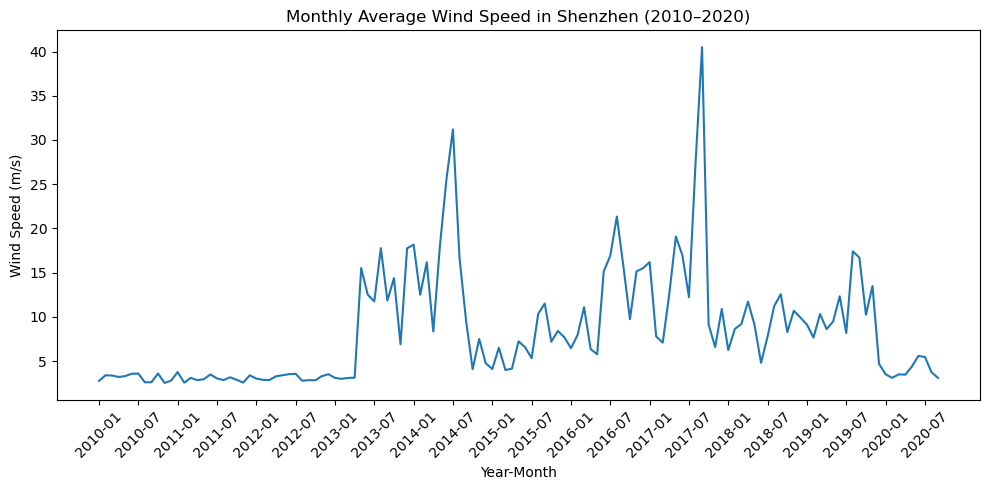

趋势分析：从 2010 年到 2020 年，深圳宝安机场的月平均风速总体上呈现出较大的年际波动，但没有显著的长期上升或下降趋势。风速的峰值多出现在台风季节，说明短期极端天气对平均风速的影响较大。


In [17]:
# 解析风速
def parse_wind_speed(wnd_str):
    try:
        parts = str(wnd_str).split(',')
        if len(parts) >= 4:
            return float(parts[3]) / 10 
    except:
        return None
    return None
data["WindSpeed"] = data["WND"].apply(parse_wind_speed)

# 时间处理与筛选
data["Date"] = pd.to_datetime(data["DATE"], errors="coerce")
data = data[(data["Date"].dt.year >= 2010) & (data["Date"].dt.year <= 2020)]

# 按年月求平均
data["YearMonth"] = data["Date"].dt.to_period("M")
monthly = data.groupby("YearMonth")["WindSpeed"].mean().reset_index()

# 画图
plt.figure(figsize=(10,5))
plt.plot(monthly["YearMonth"].astype(str), monthly["WindSpeed"])
plt.title("Monthly Average Wind Speed in Shenzhen (2010–2020)")
plt.xlabel("Year-Month")
plt.ylabel("Wind Speed (m/s)")
# 每6个月显示一个刻度
plt.xticks(ticks=range(0, len(monthly), 6),
           labels=monthly["YearMonth"].astype(str)[::6],
           rotation=45)
plt.tight_layout()
plt.show()

# 趋势分析
print("趋势分析：从 2010 年到 2020 年，深圳宝安机场的月平均风速总体上呈现出较大的年际波动，但没有显著的长期上升或下降趋势。风速的峰值多出现在台风季节，说明短期极端天气对平均风速的影响较大。")


In [18]:
# 3. 选取纽约国际机场综合地表数据进行分析
# 读入 CSV 文件
df = pd.read_csv(r"D:\ESE5023\data\72528014733.csv")
df.head()

C:\Users\22364\AppData\Local\Temp\ipykernel_29772\1361013752.py:3: DtypeWarning: Columns (36,37,46,50,51,56,57,59,60,61,62,98,107) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"D:\ESE5023\data\72528014733.csv")


,STATION,DATE,SOURCE,LATITUDE,LONGITUDE,ELEVATION,NAME,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,...,OD1,OE1,OE2,OE3,RH1,RH2,RH3,WA1,REM,EQD
0,72528014733,2014-01-01T00:00:00,4,42.93997,-78.73615,218.2,"BUFFALO NIAGARA INTERNATIONAL, NY US",FM-12,99999,V020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SYN09272528 12666 42710 11106 21161 39954 4023...,Q01 00002PRCP06
1,72528014733,2014-01-01T00:54:00,7,42.93997,-78.73615,218.2,"BUFFALO NIAGARA INTERNATIONAL, NY US",FM-15,KBUF,V030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MET10512/31/13 19:54:03 METAR KBUF 010054Z 290...,NaN
2,72528014733,2014-01-01T01:54:00,7,42.93997,-78.73615,218.2,"BUFFALO NIAGARA INTERNATIONAL, NY US",FM-15,KBUF,V030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MET10512/31/13 20:54:03 METAR KBUF 010154Z 300...,NaN
3,72528014733,2014-01-01T02:54:00,7,42.93997,-78.73615,218.2,"BUFFALO NIAGARA INTERNATIONAL, NY US",FM-15,KBUF,V030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MET12912/31/13 21:54:03 METAR KBUF 010254Z 290...,NaN
4,72528014733,2014-01-01T03:00:00,4,42.93997,-78.73615,218.2,"BUFFALO NIAGARA INTERNATIONAL, NY US",FM-12,99999,V020,...,"4,99,0134,1,999",NaN,NaN,NaN,NaN,NaN,NaN,NaN,SYN07472528 32666 42913 11083 21161 39957 4024...,NaN


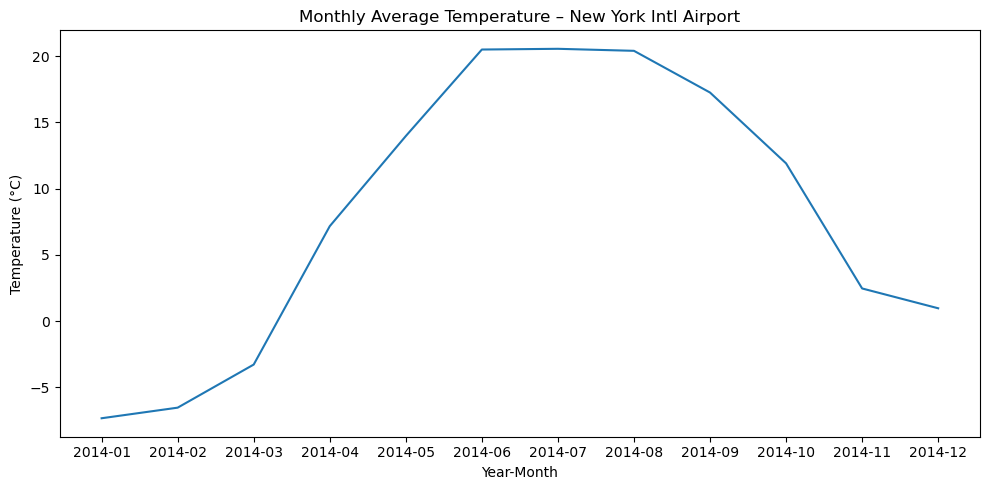

In [19]:
# 气温分析
def parse_tmp(tmp):
    try:
        val = float(str(tmp).split(',')[0])
        if val < 9999:
            return val / 10   # 单位 0.1 °C
    except:
        return None

df["Temperature"] = df["TMP"].apply(parse_tmp)
df["Date"] = pd.to_datetime(df["DATE"], errors="coerce")
df = df.dropna(subset=["Temperature", "Date"])

# 按月平均
df["YearMonth"] = df["Date"].dt.to_period("M")
monthly = df.groupby("YearMonth")["Temperature"].mean().reset_index()

# 绘图
plt.figure(figsize=(10,5))
plt.plot(monthly["YearMonth"].astype(str), monthly["Temperature"])
plt.title("Monthly Average Temperature – New York Intl Airport")
plt.xlabel("Year-Month")
plt.ylabel("Temperature (°C)")
plt.tight_layout()
plt.show()


1️.记录数量: 14377
2️.平均气温 (°C): 7.38
3️.最高气温 (°C): 31.1
4️.最低气温 (°C): -21.0
5️.标准差 (°C): 11.63


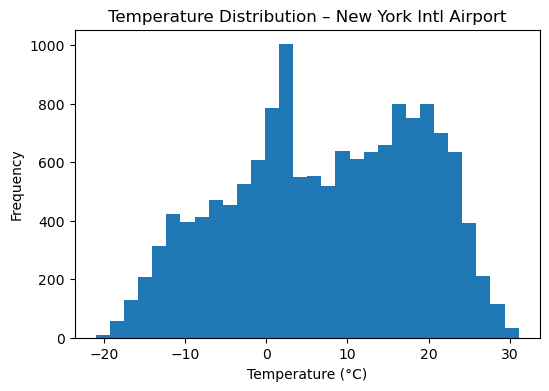

现象描述：冬季气温集中在 0 °C 以下，夏季集中在 15–25 °C 之间，平均气温7.38℃，整体气候偏凉，符合纽约温带海洋性气候特征


In [20]:
# 五项统计指标
temp = df["Temperature"]
print("1️.记录数量:", len(temp))
print("2️.平均气温 (°C):", round(temp.mean(), 2))
print("3️.最高气温 (°C):", temp.max())
print("4️.最低气温 (°C):", temp.min())
print("5️.标准差 (°C):", round(temp.std(), 2))

plt.figure(figsize=(6,4))
plt.hist(temp, bins=30)
plt.title("Temperature Distribution – New York Intl Airport")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.show()
print("现象描述：冬季气温集中在 0 °C 以下，夏季集中在 15–25 °C 之间，平均气温7.38℃，整体气候偏凉，符合纽约温带海洋性气候特征")